# Procedural Notebooks

                 
_Typically_ a notebook's author will begin an idea from a blank documents in an editable state.  Through cycles of __interactive__ computing an author will transform the notebook's data by adding narrative, code, and metadata.  The notebook's cells are __parts__ of a __whole__ computable document described by the notebook format.

The __interactive__ _in-memory_ editing mode is a critical, but fleeting stage in the life of a computable document.  Notebooks spend most of their existence as __whole__ & __static__ files _on disk_. The __static__ state of notebooks are reusable; and for notebooks to be reusable they must be reused.  

__Procedural__ notebooks are readable and reusable literate documents that can be executed successfully in other contexts like documention, module development, or external jobs.  This notebook explores the reusability of __procedural__ notebooks that 
successfully _Restart and Run All_.  

<h4> <a href="http://nbviewer.jupyter.org/github/tonyfast/restartable/blob/master/readme.ipynb">nbviewer</a>
 : 
<a href="http://nbviewer.jupyter.org/format/slides/github/tonyfast/restartable/blob/master/readme.ipynb" title="View as Slides">
      <span class="fa fa-gift fa-2x menu-icon"></span>
      <span class="menu-text">View as Slides</span>
</a>
 : 
<a href="https://github.com/tonyfast/restartable/blob/master/readme.ipynb" title="View on GitHub">
      <span class="fa fa-github fa-2x menu-icon"></span>
      <span class="menu-text">View on GitHub</span>
    </a> </h4>

## Motivation

__Procedural__ notebooks are inspired by [Paco Nathan](http://liber118.com/pxn/)'s [_Oriole: a new learning medium based on Jupyter + Docker_](http://nbviewer.jupyter.org/github/jupyterday-atlanta-2016/oriole_jupyterday_atl/blob/master/oriole_talk.ipynb) given at [Jupyter Day Atlanta 2016](https://jupyterday-atlanta-2016.github.io). In Paco's _unofficial_ [styleguide for authoring Jupyter notebooks](http://nbviewer.jupyter.org/github/jupyterday-atlanta-2016/oriole_jupyterday_atl/blob/master/oriole_talk.ipynb#What-we-learned-about-teaching-with-notebooks) he suggests:

> clear all output then "Run All" -- or it didn't happen

## __Procedural notebooks__

* ... restart and run all, or they don't.  Their reusability can be tested in different contexts.s
* ... change over time
* ... encapsulate cycles of [non-structured](https://en.wikipedia.org/wiki/Non-structured_programming),
[structured](https://en.wikipedia.org/wiki/Structured_programming), and [literate programming](https://en.wikipedia.org/wiki/Literate_programming) actions.
* ... can be executed in other contexts like testing, document conversion, or compute...
* ... can be tested as __parts__ in __interactive__ mode
* ... can be tested as a __whole__ in a __procedural__ mode
* ... may be used to create sophisticated software projects.



# This notebook is procedural notebook

Its cells _Restart and Run All_ to create a module and python package called __particles__:

* Create, describe, and test source code for a project we call __particles__.
* Copy the source code to a notebook called __particles.ipynb__
* Convert __particles.ipynb__ to __particles.py__ and a Python package called __particles__.

 > __particles__ is inspired by the New York Times R&D [_The Future of News is Not an Article_](http://nytlabs.com/blog/2015/10/20/particles/). __particles__ treat elements of computable documents as data and modular components.

## Procedurally create the particles module

__readme.ipynb__ generates the __particles__ module either in  interactive mode, or procedurally from a converted Python script.  

`attach` is a callable used by __readme__ to append the recent `In`put as cell source to __particles.ipynb__; _it is erroneous to the __particles__ module.  _If the __readme.ipynb__ cells are run out of order then __particles.ipynb__ could be created incorrectly._

In [1]:
from nbformat import v4, NotebookNode
nb, particles = 'particles.ipynb', v4.new_notebook();
def attach(nb:NotebookNode=particles)->None:
    """attach an input to another notebook removing attach statements.
    >>> nb = v4.new_notebook();
    >>> assert attach(nb) or ('doctest' in nb.cells[-1].source)"""
    'In' in globals() and nb.cells.append(v4.new_code_cell('\n'.join(
        str for str in In[-1].splitlines() if not str.startswith('attach'))))

# build `particles.ipynb`

> Many cells in __readme.ipynb__ have lived and died before you read this line.

The __code__ cell below will be appended to __particles.ipynb__.  It __import__s tools into __readme.ipynb__'s interactive mode.  It now becomes quite easy to iteratively develop and test __parts__ of the procedural document.

In [2]:
attach(particles)
"""particles treat notebooks as data"""

'particles treat notebooks as data'

In [3]:
attach(particles)
from nbformat import reads, v4 
from pandas import concat, DataFrame, to_datetime 
from pathlib import Path 

# callables in `particles` 

Create two main functions for __particles__ to export

In [4]:
attach()
def read_notebooks(dir:str='.')->DataFrame:
    """Read a directory of notebooks into a pandas.DataFrame
    >>> df = read_notebooks('.')
    >>> assert len(df) and isinstance(df, DataFrame)"""
    return concat({
        file: DataFrame(reads(file.read_text(), 4)['cells'])
        for file in Path(dir).glob('*.ipynb')
    }).reset_index(-1, drop=True)

The `read_notebooks` index is a pathlib object containing extra metadata. `files_to_data` extracts the `stat` properties for each file.

In [5]:
attach()
def files_to_data(df:DataFrame)->DataFrame:
    """Transform an index of Path's to a dataframe of os_stat.
    >>> df = files_to_data(read_notebooks())
    """
    stats, index = [], df.index.unique()
    for file in index:
        stat = file.stat() 
        stats.append({
            key: to_datetime(
                getattr(stat, key), unit=key.endswith('s') and key.rsplit('_')[-1] or 's'
            ) if 'time' in key else getattr(stat, key)
            for key in dir(stat) if not key.startswith('_') and not callable(getattr(stat, key))})
    # Append the change in time to the dataframe.
    return DataFrame(stats, index).pipe(lambda df: df.join((df.st_mtime - df.st_birthtime).rename('dt')))

## Control Flow in Procedural Notebooks

A procedural notebooks will use clues from a namespace to decide what statements to execute in different contexts.

In [6]:
if __name__ != '__main__': assert __name__+'.py' == __file__

### In Jupyter mode

> **`__name__`** == **`'__main__'`**, but nothing is known about the python object **`__file__`**.

### In Setup mode

> **`__name__`** == **`'__main__'`** and **`assert __file__`** .

### As a python package mode

> **`__name__ + '.py'`** == **`__file__`**.

### `get_ipython`

The `get_ipython` context must be manually imported to use magics in converted notebooks.

In [7]:
    from IPython import get_ipython

### Controlling value assignment

Introspect the interactive Jupyter namespace to control expressions in procedural notebooks.

    
    thing = get_ipython().user_ns.get('thing', 42):

## `readme` procedures <small>to make <code>particles</code></small>

Below are the procedures to test and create the `particles` package.

* [`doctest`](https://docs.python.org/3/library/doctest.html)s were declared in each of our functions.  `doctest` can be run in an interactive notebook session, [`unittest`](https://docs.python.org/3/library/unittest.html) cannot.

    `doctest` catches a lot of errors when it is in the _Restart and Run All_ pipeline.  It is a great place to stash repeatedly typed statements.
    
* When the tests pass write the __particles.ipynb__ notebook.

In [8]:
if __name__ == '__main__':
    print(__import__('doctest').testmod())
    Path(nb).write_text(__import__('nbformat').writes(particles))

TestResults(failed=0, attempted=5)


* Transform both __readme.ipynb__ and the newly minted __particles.ipynb__ to python scripts.
* Autopep it because we can.
* Rerun the same tests on __particles.py__

In [9]:
if __name__ == '__main__' and '__file__' not in globals():
    !jupyter nbconvert --to python --TemplateExporter.exclude_input_prompt=True particles.ipynb readme.ipynb
    !autopep8 --in-place --aggressive readme.py particles.ipynb
    !python -m doctest particles.py & echo "success"
    !jupyter nbconvert --to markdown --TemplateExporter.exclude_input_prompt=True readme.ipynb

[NbConvertApp] Converting notebook particles.ipynb to python
[NbConvertApp] Writing 1234 bytes to particles.py
[NbConvertApp] Converting notebook readme.ipynb to python
[NbConvertApp] Writing 9935 bytes to readme.py
success
[NbConvertApp] Converting notebook readme.ipynb to markdown
[NbConvertApp] Support files will be in readme_files/
[NbConvertApp] Making directory readme_files
[NbConvertApp] Making directory readme_files
[NbConvertApp] Writing 12839 bytes to readme.md


* `setuptools` will install the __particles__ package  using the conditions for setup mode.  

    > Install the __particles__ package
    
    >    `python readme.py develop`

In [10]:
    if __name__ == '__main__' and '__file__' in globals():
        __import__('setuptools').setup(
            name="particles", 
            py_modules=['particles'], 
            install_requires=['notebook', 'pandas'])

## Reusing `particles`

__Particles__ can now be imported into the current scope. __particles__ allow the user to explore notebooks and their cells as data.

In [11]:
import particles
assert particles.__file__.endswith('.py')
%matplotlib inline
from matplotlib import pyplot as plt
df = particles.read_notebooks()
df.sample(5)

,cell_type,execution_count,metadata,outputs,source
readme.ipynb,markdown,NaN,{'slideshow': {'slide_type': 'subslide'}},NaN,# callables in `particles` \n\nCreate two main...
readme.ipynb,code,13.0,{'slideshow': {'slide_type': '-'}},"[{'metadata': {}, 'output_type': 'display_data...",\n df.cell_type.groupby(df.index).value...
particles.ipynb,code,NaN,{},[],def read_notebooks(dir:str='.')->DataFrame:\n ...
readme.ipynb,markdown,NaN,{'slideshow': {'slide_type': 'fragment'}},NaN,## Quantifying lines of code
readme.ipynb,code,10.0,{'collapsed': True},[],if __name__ == '__main__' and '__file__' i...


## Quantifying lines of code

In [12]:
df.source.str.split('\n').apply(len).groupby([df.index, df.cell_type]).sum().to_frame('lines of ...').unstack(-1)

lines of ...         
cell_type               code markdown
particles.ipynb         26.0      NaN
readme.ipynb            63.0    107.0

### The distribution of markdown and code cells in the __particles__ project.


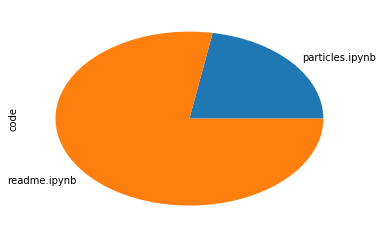

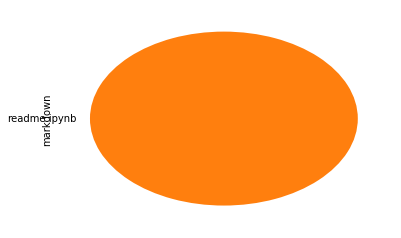

In [13]:
    
    df.cell_type.groupby(df.index).value_counts().unstack('cell_type').apply(lambda df: df.plot.pie() and plt.show());

# Summary

This document must _Restart and Run All_ to acheive the goals of creating the __particles__ module.

* __Procedural__ notebooks _Restart and Run All_ or they don't; they can be tested.
* Not all notebooks survive, the lucky ones become __procedural__ notebooks.
* Literate __procedural__ notebooks reinforce readability and reusability to reproducible work.
* __Procedural__ tend to maintain a longer shelf life than an exploratory notebook.
* __Interactive__ programming is complex and an author will rely on multiple styles of programming to acheive a __procedural__ document.